# **I. Project Objectives**

**1. Customer Segmentation**

- By Age Group: Segment customers into age groups to analyze how behavior varies by age.
- By Gender: Explore the difference in purchasing patterns between male and female customers.
- By Purchase Frequency: Analyze how often different customers purchase and segment them into groups like weekly, fortnightly, quarterly, etc.

**2. Purchase Trends**

- By Category: Compare how much customers spend on different categories.
- By Location: Investigate regional differences in purchasing behavior and customer spending.
- By Item Purchased: Look at the popularity of different items such as Blouse, Sweater, Jeans, etc., to identify top sellers.

**3. Pricing and Review Analysis**

- Purchase Amount vs. Review Rating: Analyze if higher purchase amounts correlate with better or worse customer ratings.
- Discount Usage: Compare the purchasing amounts with and without discounts applied and explore if discounts drive more purchases.

**4. Customer Loyalty and Subscription Analysis**

- Subscription Status: Investigate whether customers with subscriptions tend to spend more or make more frequent purchases.
- Previous Purchases: Analyze the impact of previous purchases on future buying behavior. Customers with more previous purchases might be more loyal.

**5. Payment Method Preferences**

- By Payment Method: Explore which payment methods are most popular and if they impact the frequency of purchases.
- Payment Method and Purchase Amount: Check if there’s any correlation between certain payment methods and higher purchase amounts.

**6. Shipping Preferences and Costs**

- Shipping Type Analysis: Compare the purchase amount and customer satisfaction based on shipping type.
- Purchase Amount vs. Shipping Type: Investigate whether customers using "Express" shipping spend more than those opting for "Free Shipping."

**7. Customer Frequency Analysis**

- Frequency of Purchases: Analyze how often different customers make purchases (e.g., Weekly, Quarterly) and their overall lifetime value.
- Loyalty by Frequency: See if customers who purchase more frequently tend to have a higher number of previous purchases, indicating higher loyalty.

**8. Seasonal Purchasing Patterns**

- By Season: Explore how purchasing behavior changes with different seasons (Winter, Spring, Summer, Fall). For example, are customers buying more clothing in winter?

# **II. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **III. Read Dataset**

In [ ]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/shopping_behavior_updated.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    df = pd.read_csv(csv_file)
else:
    print('file not found')

# **IV. Exploratory Data Analysis - EDA**

In [3]:
# Show data
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Check null value
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [5]:
# Check not null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
# Check data type of each columns
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [7]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [8]:
# Check unique value of column Age
df['Age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

In [9]:
# Check unique value of column Gender
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
# Check unique value of column Item Purchased
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [11]:
# Check unique value of column Category
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [12]:
# Check unique value of column Location
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [13]:
# Check unique value of column Size
df['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [14]:
# Check unique value of column Color
df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [15]:
# Check unique value of column Season
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [16]:
# Check unique value of column Shipping Type
df['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [17]:
# Check unique value of column Payment Method
df['Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [18]:
# Check unique value of column Frequency of Purchase
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

# **V. Data Cleaning**

In [19]:
# Convert wrong datatype into correct datatype
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(int)
df['Customer ID'] = df['Customer ID'].astype(str)

In [20]:
# Check duplicate value
duplicated_data = df[df.duplicated()].sort_values('Customer ID', ascending=True)

In [21]:
# Show duplicate value
duplicated_data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


# **VI. Answer the Question by Data Visualization**

**1. Customer Segmentation**

- By Age Group: Segment customers into age groups to analyze how behavior varies by age.
- By Gender: Explore the difference in purchasing patterns between male and female customers.
- By Purchase Frequency: Analyze how often different customers purchase and segment them into groups like weekly, fortnightly, quarterly, etc.

Q1: How many total customers segmentated by age group?

In [22]:
# Age group bins
bins = [18, 25, 35, 45, 55, 65]

# Labels for age groups
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Create new Age Group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

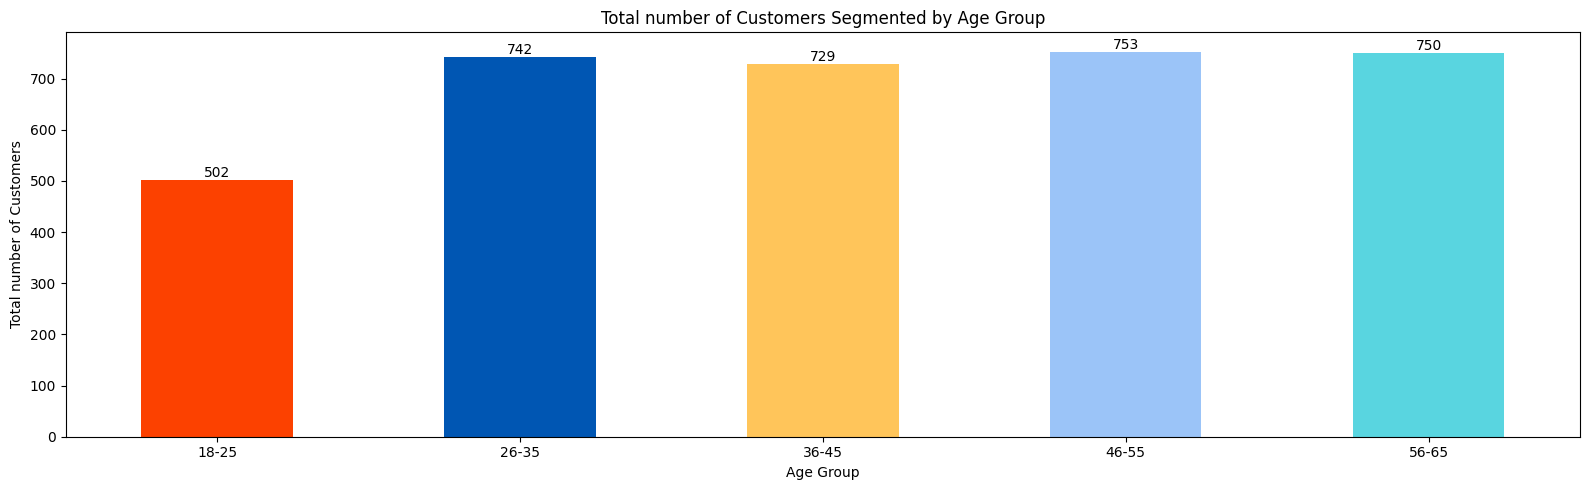

In [23]:
# Count total Customers by Age Group
total_customer_by_age_group = df['Age Group'].value_counts().sort_index()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the data as a bar chart
bars = total_customer_by_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Total number of Customers Segmented by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total number of Customers')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

Q2: How many total customers based on age group and gender?

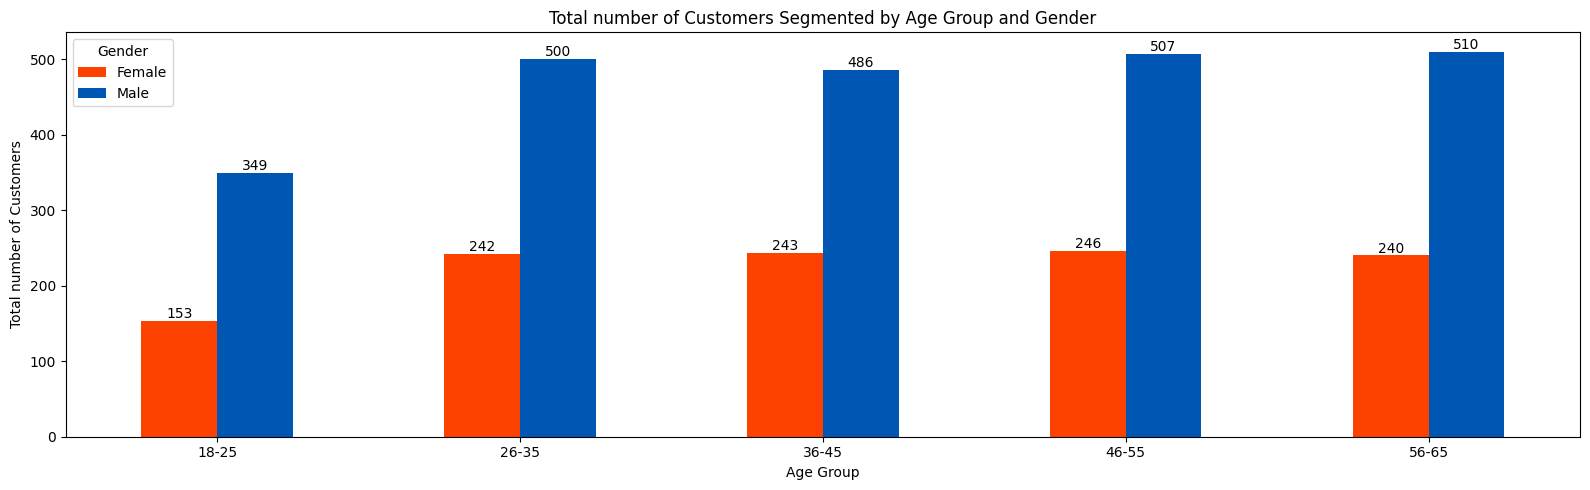

In [24]:
# Count total Customers by Age Group and Gender
total_customer_by_age_group_and_gender = df.groupby(['Age Group'])['Gender'].value_counts().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = total_customer_by_age_group_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Total number of Customers Segmented by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total number of Customers')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

Q3: How much average Purchase Amount (USD) by Group Age?

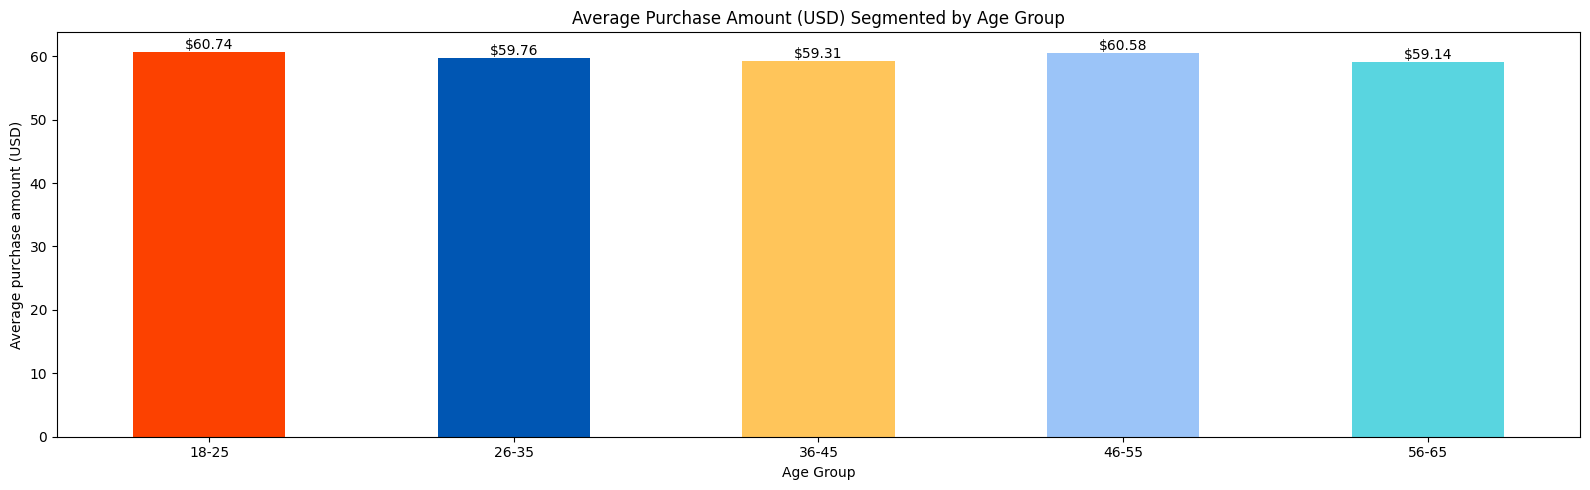

In [25]:
# Average Purchase Amount (USD) by Age Group
average_purchase_amount_by_age_group = df.groupby('Age Group')['Purchase Amount (USD)'].mean()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the data as a bar chart
bars = average_purchase_amount_by_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount (USD) Segmented by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average purchase amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

Q4: How much average purchase amount (USD) by age group and gender?

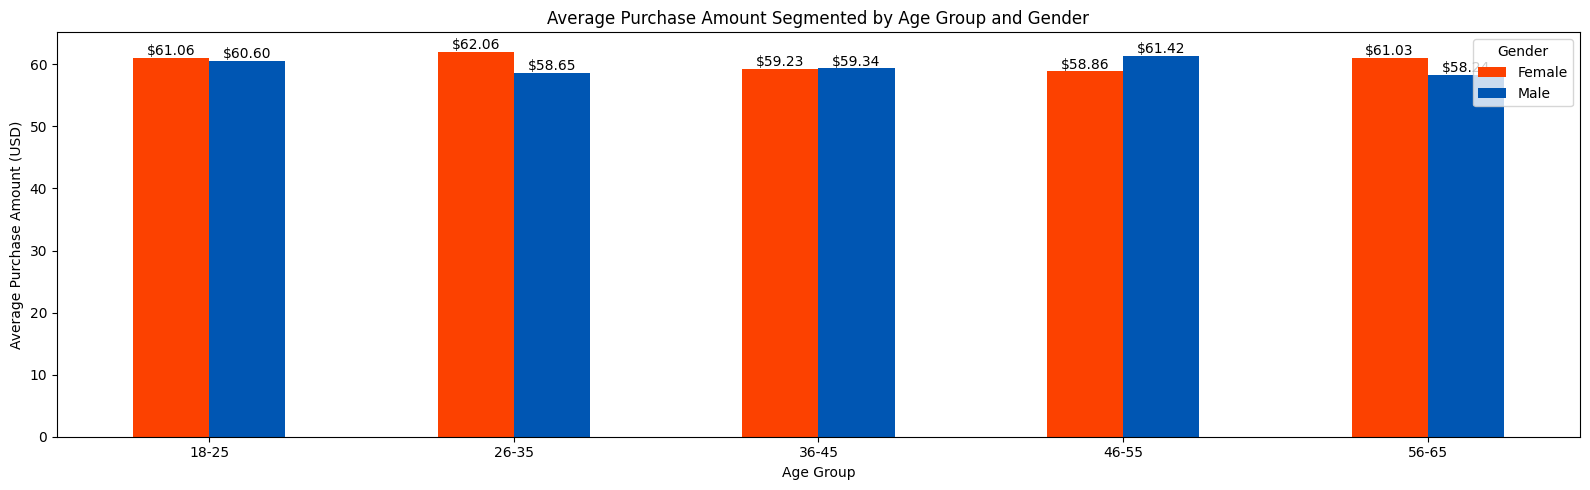

In [26]:
# Average Purchase Amount (USD) by Age Group and Gender
average_purchase_amount_by_age_group_and_gender = df.groupby(['Age Group', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = average_purchase_amount_by_age_group_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount Segmented by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

Q5: How much average Purchase Amount (USD) by Purchase Frequency?

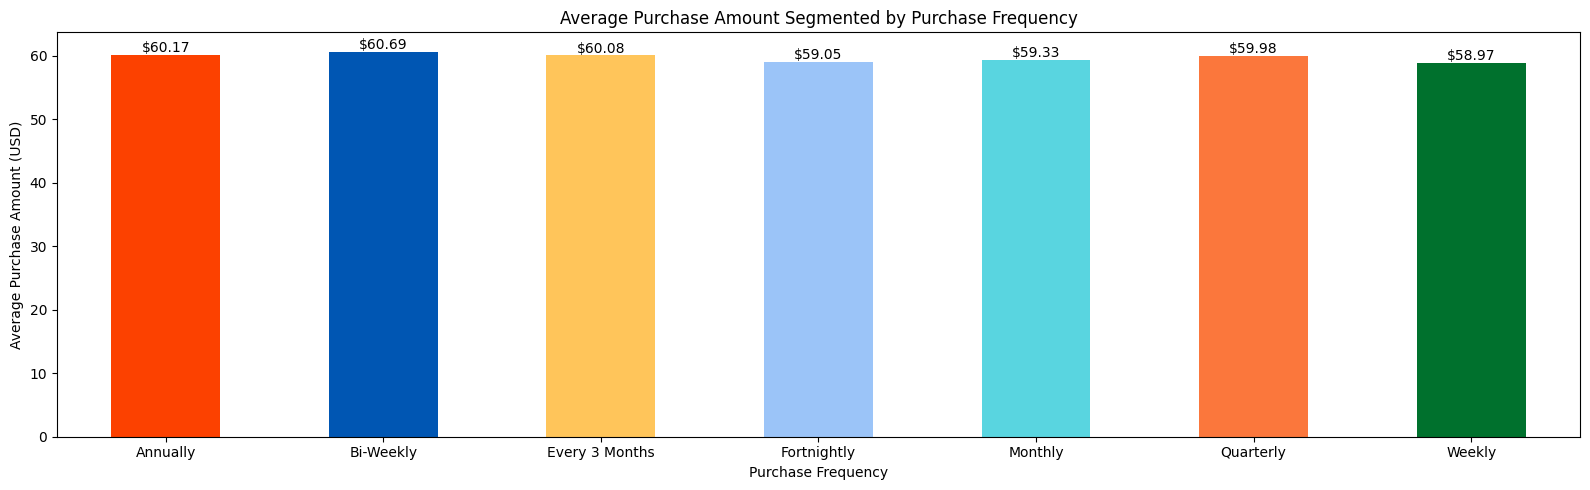

In [27]:
# Average Purchase Amount by Purchase Frequency
average_purchase_amount_by_purchase_fre = df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].mean()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C', '#00712D']

# Plot the data as a bar chart
bars = average_purchase_amount_by_purchase_fre.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount Segmented by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

Q6: How much average Purchase Amount (USD) by Purchase Frequency and Gender?

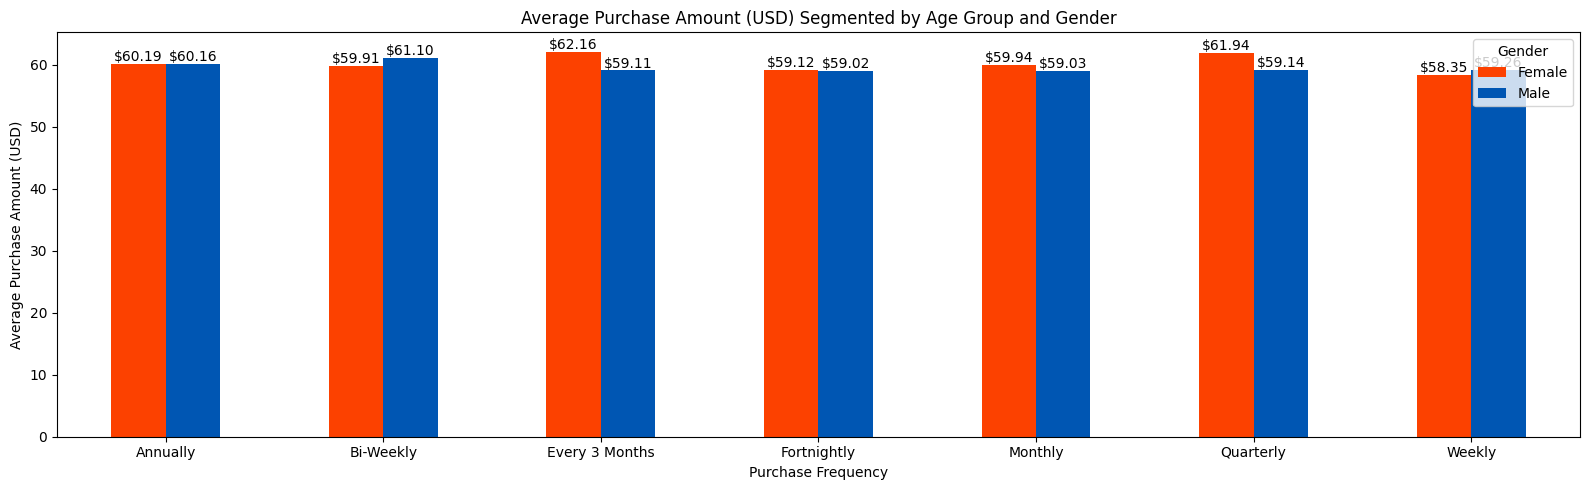

In [28]:
# Average Purchase Amount by Purchase Frequency and Gender
average_purchase_amount_by_purchase_fre_and_gender = df.groupby(['Frequency of Purchases', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = average_purchase_amount_by_purchase_fre_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount (USD) Segmented by Age Group and Gender')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

Q7: How many total Customers by each Gender?

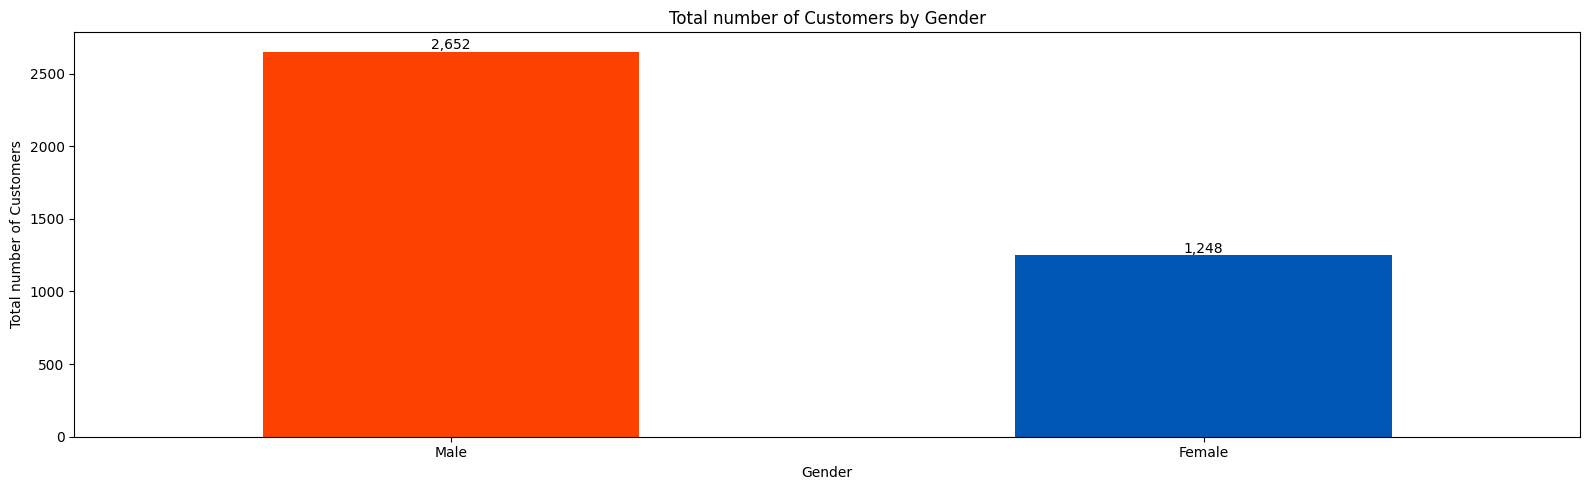

In [29]:
# Total number of Customers
total_spend_by_categories = df['Gender'].value_counts()
colors = ['#FC4100', '#0056B3']

# Plot data as a bar chart
bars = total_spend_by_categories.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Total number of Customers by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total number of Customers')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

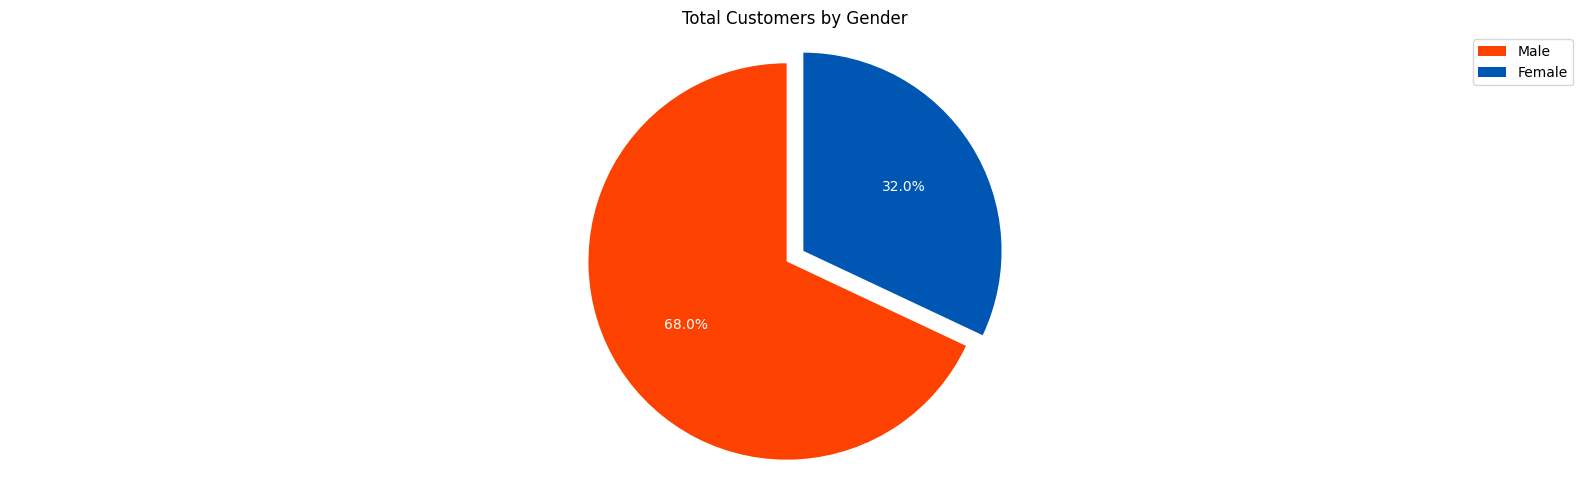

In [30]:
# Count total Customers by Gender
total_customers_by_gender = df['Gender'].value_counts()
colors = ['#FC4100', '#0056B3']

# Plot pie chart
plt.figure(figsize=(16, 5))
plt.pie(total_customers_by_gender, 
        labels=total_customers_by_gender.index, 
        colors=colors, 
        explode=(0, 0.1),  # Explode second slice
        autopct='%1.1f%%', 
        textprops={'color': '#ffffff'}, 
        startangle=90)

# Add title
plt.title('Total Customers by Gender')

# Add legend
plt.legend(labels=total_customers_by_gender.index, loc="best")

# Equal axis ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

**2. Purchase Trends**

- By Category: Compare how much customers spend on different categories.
- By Location: Investigate regional differences in purchasing behavior and customer spending.
- By Item Purchased: Look at the popularity of different items such as Blouse, Sweater, Jeans, etc., to identify top sellers.

Q1: How much money Customer spends on different Categories?

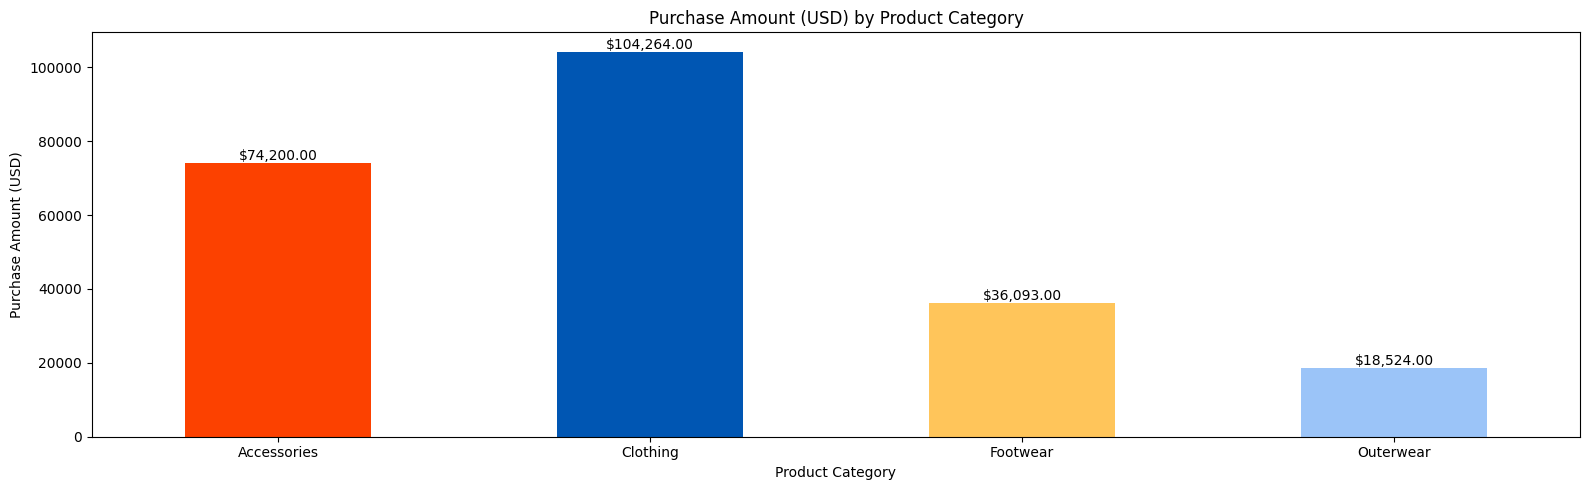

In [31]:
# Total Purchase Amount of Customer spends on different Product Categories
total_spend_by_categories = df.groupby(['Category'])['Purchase Amount (USD)'].sum()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8']

# Plot data as a bar chart
bars = total_spend_by_categories.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Purchase Amount (USD) by Product Category')
plt.xlabel('Product Category')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

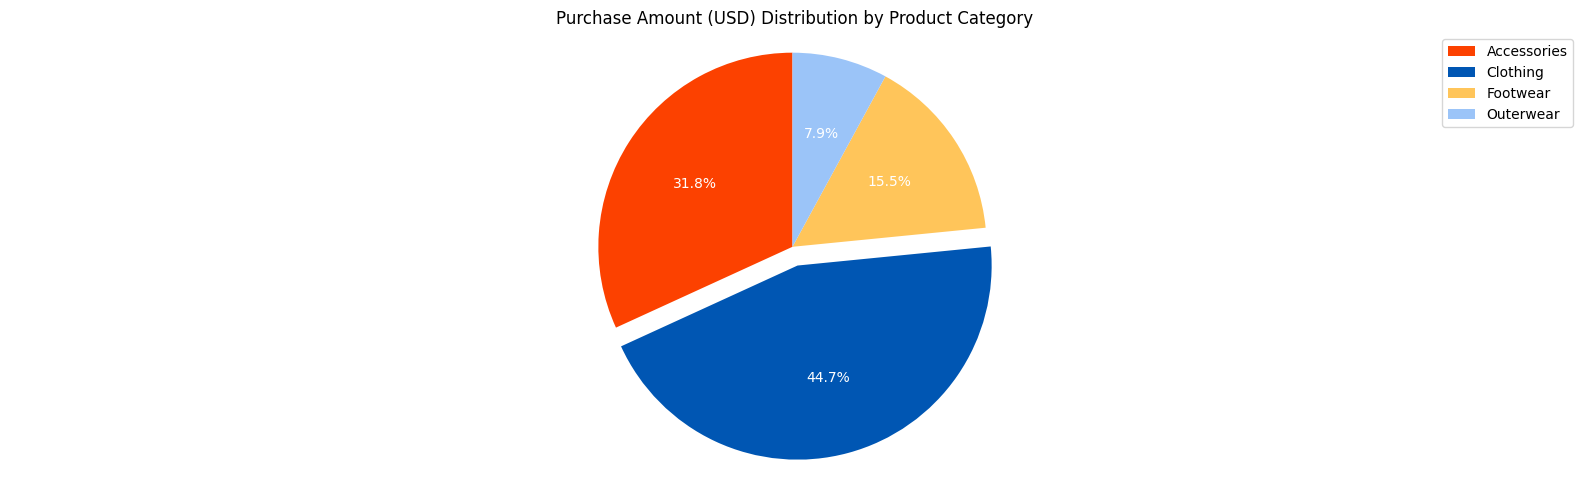

In [32]:
# Total Purchase Amount of Customer spends on different Product Categories
total_spend_by_categories = df.groupby(['Category'])['Purchase Amount (USD)'].sum()
colors=['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8']

# Plot data as a pie chart
plt.figure(figsize=(16, 5))
explode = [0.1 if i == total_spend_by_categories.idxmax() else 0 for i in total_spend_by_categories.index]

# Add datalabel into the pie chart
plt.pie(total_spend_by_categories, 
        labels=total_spend_by_categories.index, 
        autopct='%1.1f%%', 
        explode=explode,
        textprops={'color': '#ffffff'},
        startangle=90, 
        colors=colors)

# Add title
plt.title('Purchase Amount (USD) Distribution by Product Category')

# Add legend
plt.legend(labels=total_spend_by_categories.index, loc="best")

# Show the plot
plt.axis('equal') 

# Show the plot
plt.tight_layout()
plt.show()

Q2: How much money Customer spends on different Categories by Gender?

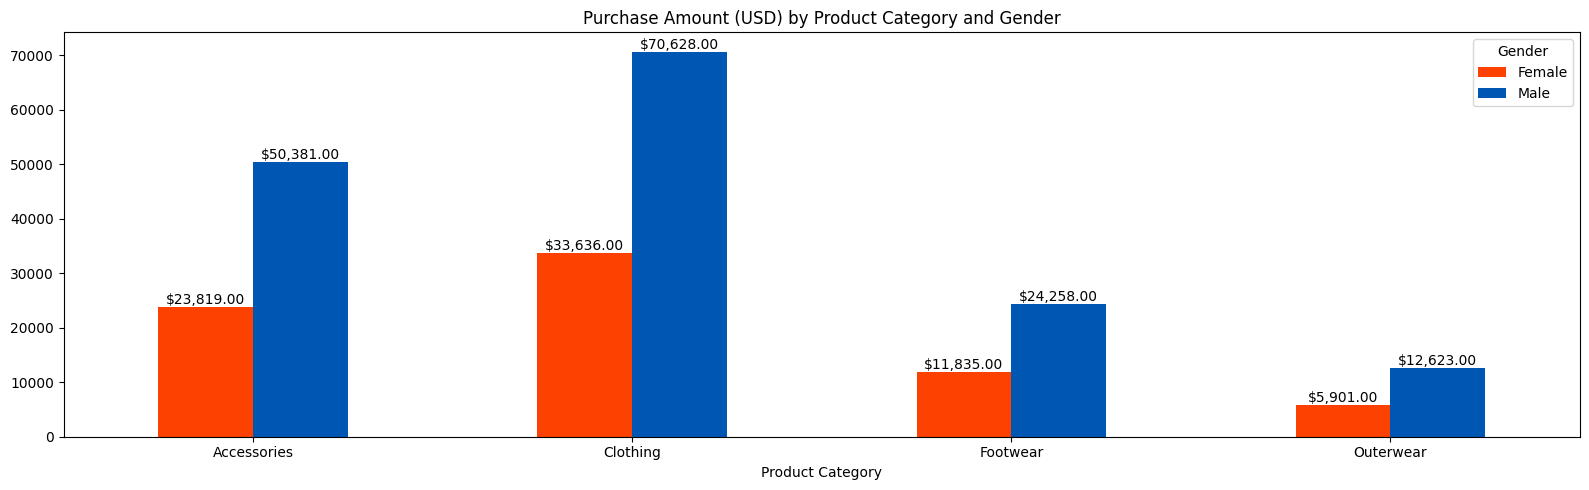

In [33]:
# Total Purchase Amount Customer spends by different Product Categories and Gender
total_spend_by_categories_and_gender = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].sum().unstack()
colors=['#FC4100', '#0056B3']

# Plot data as a bar chart
bars = total_spend_by_categories_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Purchase Amount (USD) by Product Category and Gender')
plt.xlabel('Product Category')
plt.xticks(rotation=0, ha='center')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

Q3: How much money customers spend on different Categories by Age Group?

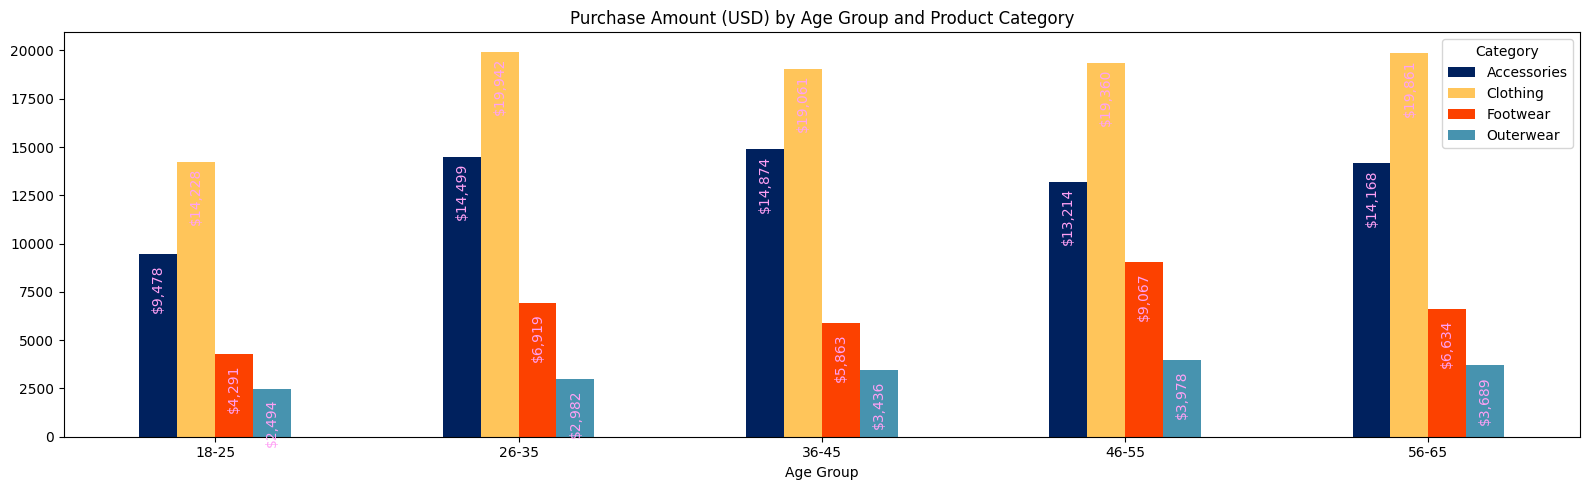

In [34]:
# Total Purchase Amount Customer spends by different Product Categories
total_spend_by_categories_and_age_group = df.groupby(['Age Group', 'Category'])['Purchase Amount (USD)'].sum().unstack()
colors = ['#00215E', '#FFC55A', '#FC4100', '#4793AF']

# Plot data as a bar chart
bars = total_spend_by_categories_and_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Purchase Amount (USD) by Age Group and Product Category')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.0f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  color='#FFA1F5',
                  textcoords='offset points',
                  xytext=(0, -25),
                  rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Q4: How much Customers spend based on Location?

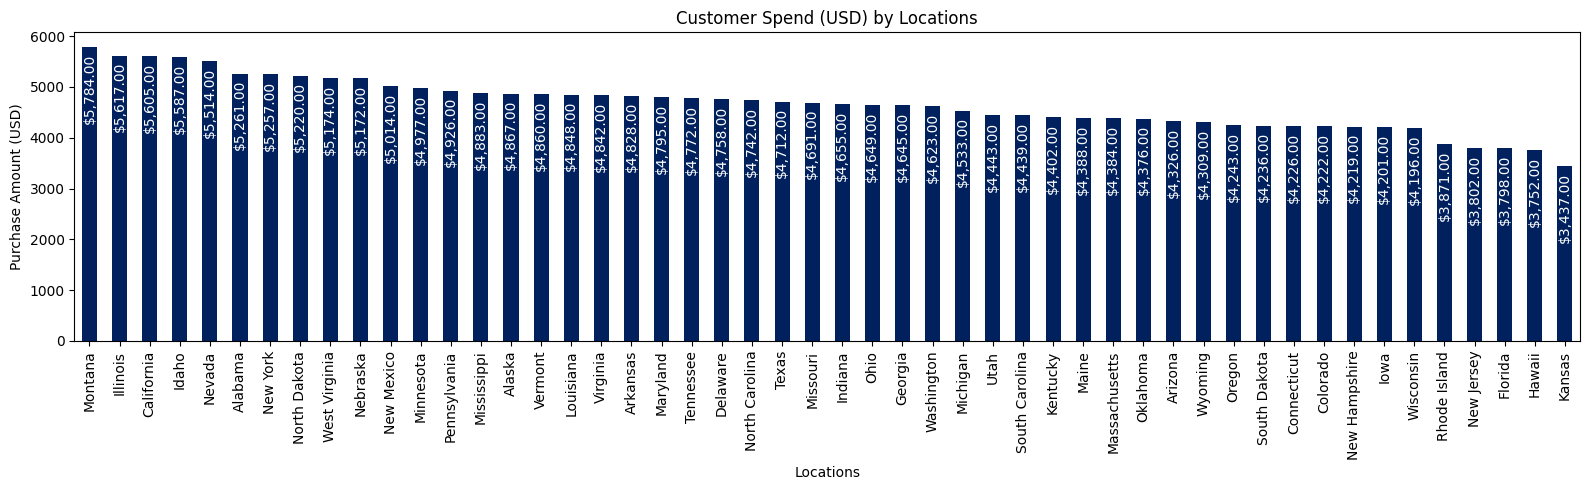

In [35]:
# Caculate customer spend based on Location
customer_spend_by_location = df.groupby(['Location'])['Purchase Amount (USD)'].sum().sort_values(ascending=False)
colors = ['#00215E']

# Plot data as a bar chart
bars = customer_spend_by_location.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Customer Spend (USD) by Locations')
plt.xlabel('Locations')
plt.xticks(rotation=90)
plt.ylabel('Purchase Amount (USD)')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  color='#ffffff',
                  xytext=(0, -30),
                  textcoords='offset points',
                  rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Q5: What are the most Popular products?

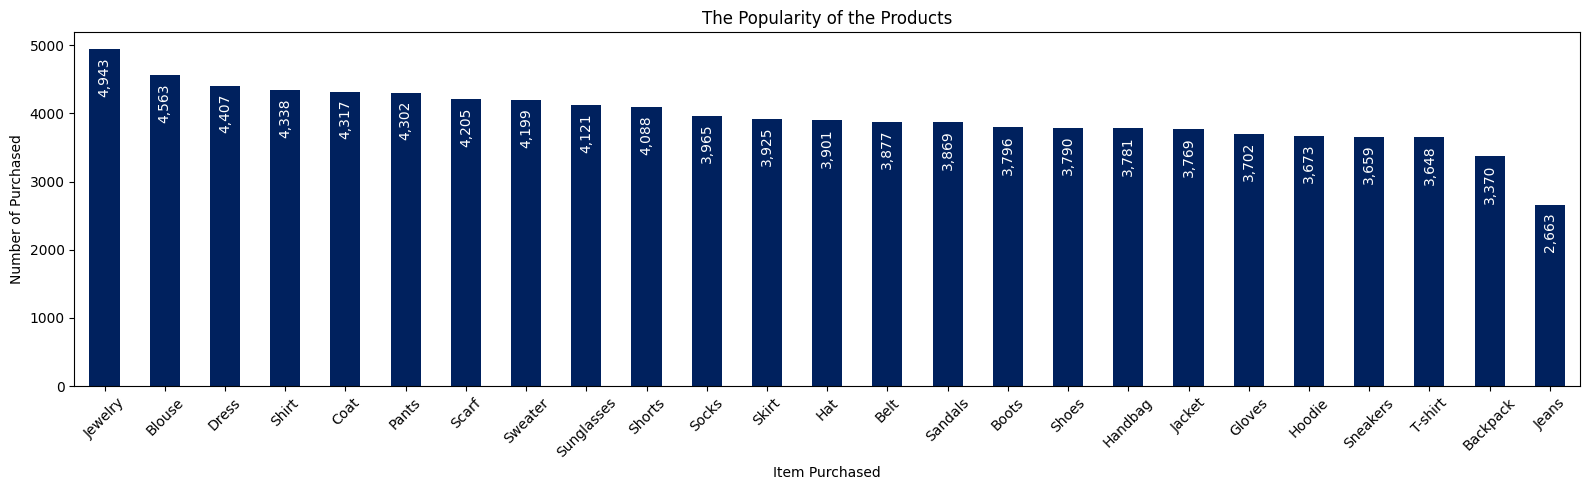

In [36]:
# Calculate total puchase number of the customer by Previous Purchase
total_purchase_by_previous_purchase = df.groupby(['Item Purchased'])['Previous Purchases'].sum().sort_values(ascending=False)
colors = ['#00215E']

# Plot the data as a bar chart
bars = total_purchase_by_previous_purchase.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('The Popularity of the Products')
plt.xlabel('Item Purchased')
plt.xticks(rotation=45)
plt.ylabel('Number of Purchased')


# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, -20),
                  color='#ffffff',
                  textcoords='offset points',
                  rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

**3. Pricing and Review Analysis**

- Purchase Amount vs. Review Rating: Analyze if higher purchase amounts correlate with better or worse customer ratings.
- Discount Usage: Compare the purchasing amounts with and without discounts applied and explore if discounts drive more purchases.

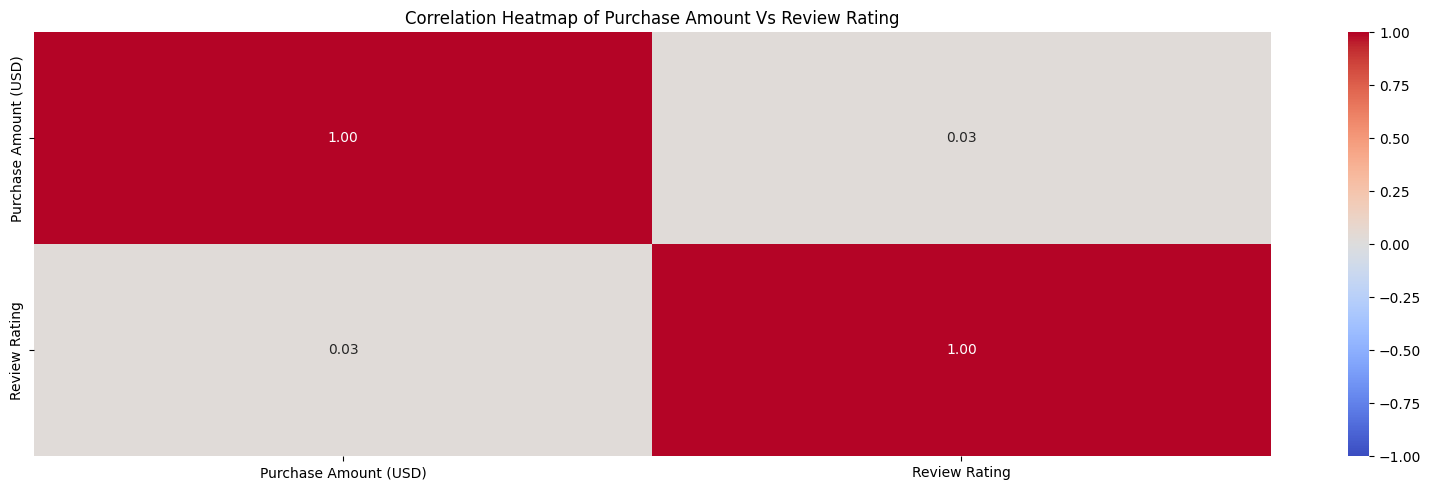

In [37]:
# Compute the correlation matrix
purchase_amount_rating_correlation_matrix = df[['Purchase Amount (USD)', 'Review Rating']].corr()

# Create a heatmap
plt.figure(figsize=(16, 5))
sns.heatmap(purchase_amount_rating_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Heatmap of Purchase Amount Vs Review Rating')

# Show the plot
plt.tight_layout()
plt.show()

**1. Correlation Coefficient Values:**

- The heatmap will show a matrix with correlation coefficient values ranging from -1 to 1.
- 1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally).
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).
- 0 indicates no correlation (no linear relationship between the variables)

**2. Color Intensity:**
- The colors in the heatmap will range from cool (blue) to warm (red), or vice versa, depending on the colormap used (coolwarm in this case).
- Cooler colors (blue) typically represent a negative correlation.
- Warmer colors (red) typically represent a positive correlation.

**3. Interpretation:**

- A high positive correlation coefficient close to 1 (0.85) between Purchase Amount (USD) and Review Rating, it indicates that higher purchase amounts are associated with higher review ratings.

- Conversely, a high negative correlation coefficient close to -1 (-0.75), it suggests that as the purchase amount increases, the review rating tends to decrease.

- If the correlation coefficient is close to 0 (0.03), it means there is little to no linear relationship between purchase amount and review rating.

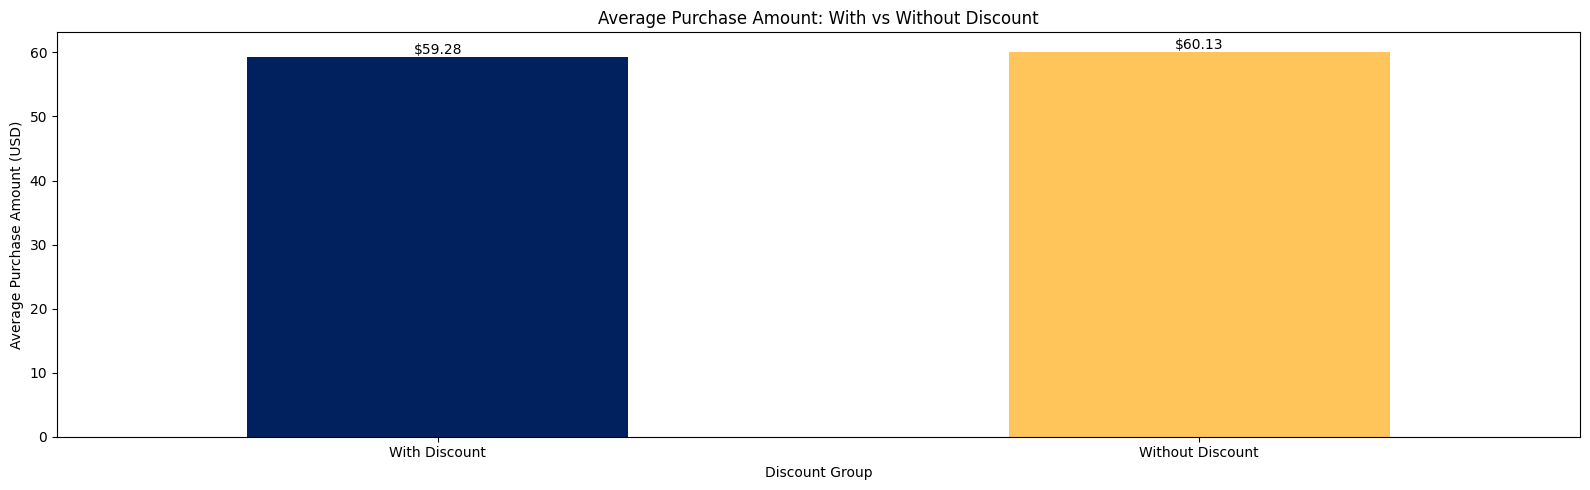

In [38]:
# Discount Usage Analysis
df['Discount Group'] = df['Discount Applied'].map({'Yes': 'With Discount', 'No': 'Without Discount'})

# Discount analysis
discount_analysis = df.groupby('Discount Group')['Purchase Amount (USD)'].mean()
colors = ['#00215E', '#FFC55A']

# Plot the data as a bar chart
bars = discount_analysis.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Purchase Amount: With vs Without Discount')
plt.xlabel('Discount Group')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

**4. Customer Loyalty and Subscription Analysis**

- Subscription Status: Investigate whether customers with subscriptions tend to spend more or make more frequent purchases.
- Previous Purchases: Analyze the impact of previous purchases on future buying behavior. Customers with more previous purchases might be more loyal.

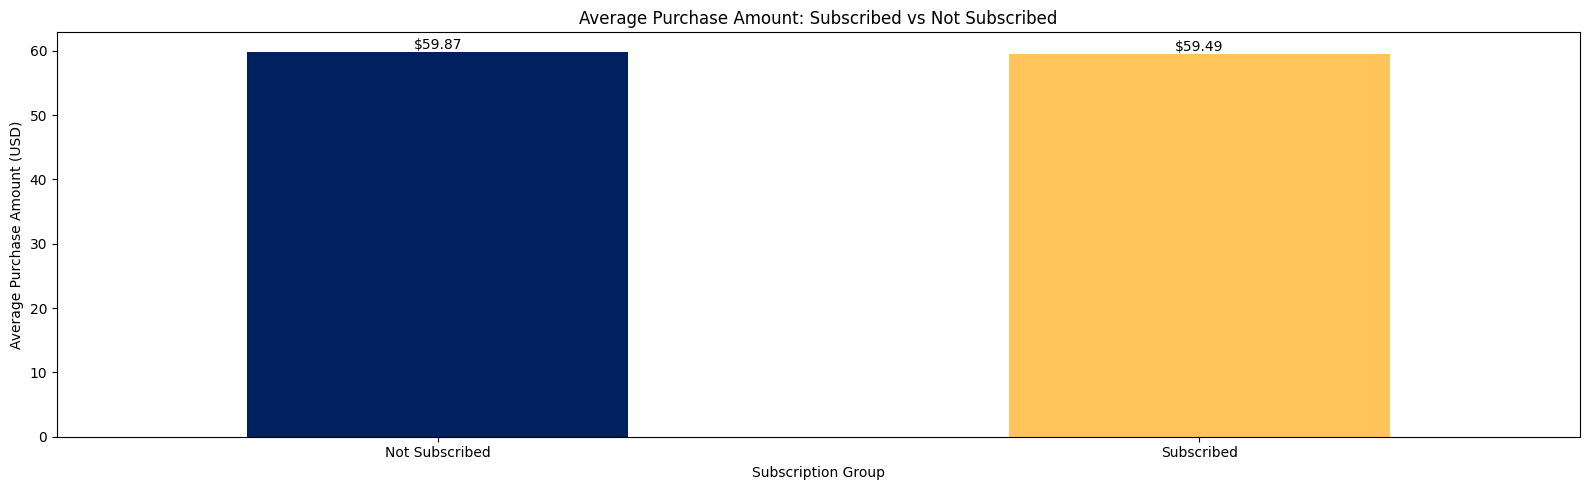

In [39]:
# 1. Subscription Status vs. Purchase Amount
df['Subscription Group'] = df['Subscription Status'].map({'Yes': 'Subscribed', 'No': 'Not Subscribed'})

# Discount analysis
subscription_analysis = df.groupby('Subscription Group')['Purchase Amount (USD)'].mean()
colors = ['#00215E', '#FFC55A']

# Plot the data as a bar chart
bars = subscription_analysis.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Purchase Amount: Subscribed vs Not Subscribed')
plt.xlabel('Subscription Group')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

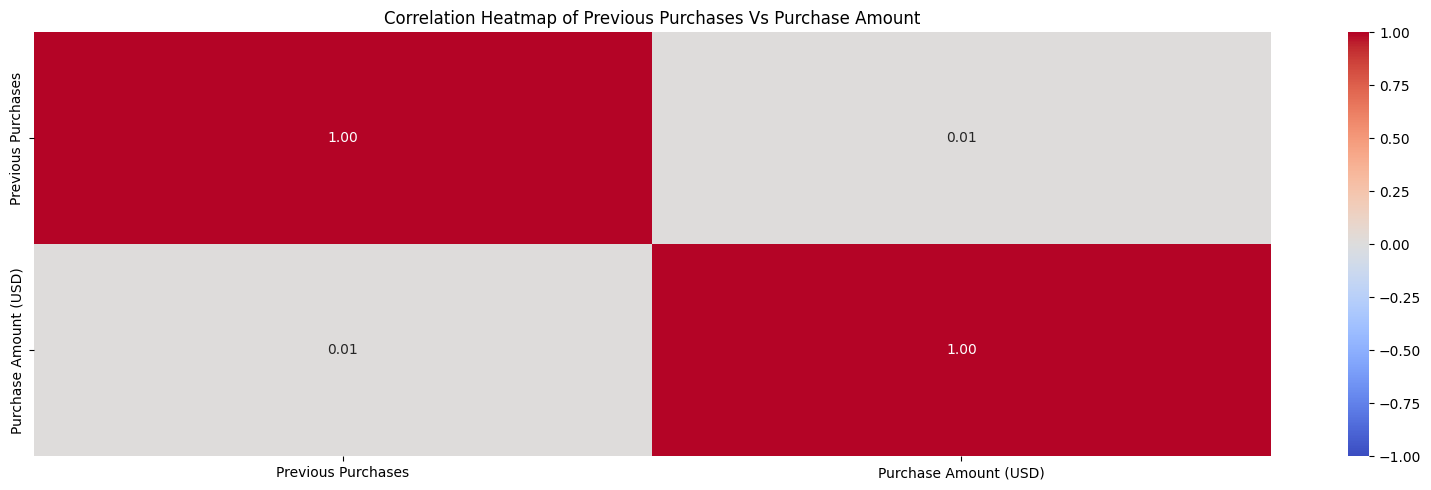

In [40]:
# 2. Previous Purchases vs. Purchase Amount (USD)
pre_purchase_purchase_amount_correlation_matrix = df[['Previous Purchases', 'Purchase Amount (USD)']].corr()

# Create a heatmap
plt.figure(figsize=(16, 5))
sns.heatmap(pre_purchase_purchase_amount_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Heatmap of Previous Purchases Vs Purchase Amount')

# Show the plot
plt.tight_layout()
plt.show()

**A. Correlation Coefficient Values:**

- The heatmap will show a matrix with correlation coefficient values ranging from -1 to 1.
- 1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally).
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).
- 0 indicates no correlation (no linear relationship between the variables)

**B. Color Intensity:**
- The colors in the heatmap will range from cool (blue) to warm (red), or vice versa, depending on the colormap used (coolwarm in this case).
- Cooler colors (blue) typically represent a negative correlation.
- Warmer colors (red) typically represent a positive correlation.

**C. Interpretation:**

- A high positive correlation coefficient close to 1 (0.85) between Purchase Amount (USD) and Review Rating, it indicates that higher purchase amounts are associated with higher review ratings.

- Conversely, a high negative correlation coefficient close to -1 (-0.75), it suggests that as the purchase amount increases, the review rating tends to decrease.

- If the correlation coefficient is close to 0 (0.01), it means there is little to no linear relationship between purchase amount and review rating.

**5. Payment Method Preferences**

- By Payment Method: Explore which payment methods are most popular and if they impact the frequency of purchases.
- Payment Method and Purchase Amount: Check if there’s any correlation between certain payment methods and higher purchase amounts.

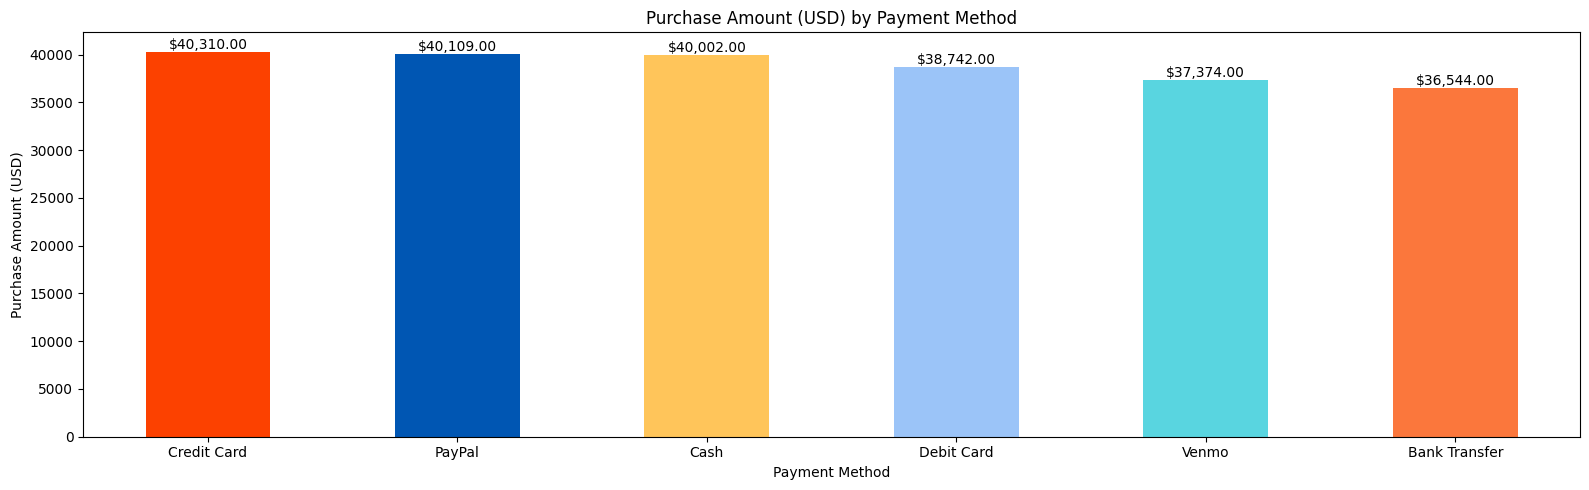

In [41]:
# Count the number of Payment Methods
count_payment_method = df.groupby(['Payment Method'])['Purchase Amount (USD)'].sum().sort_values(ascending=False)
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the data as a bar chart
bars = count_payment_method.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Purchase Amount (USD) by Payment Method')
plt.xlabel('Payment Method')
plt.xticks(rotation=0)
plt.ylabel('Purchase Amount (USD)')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

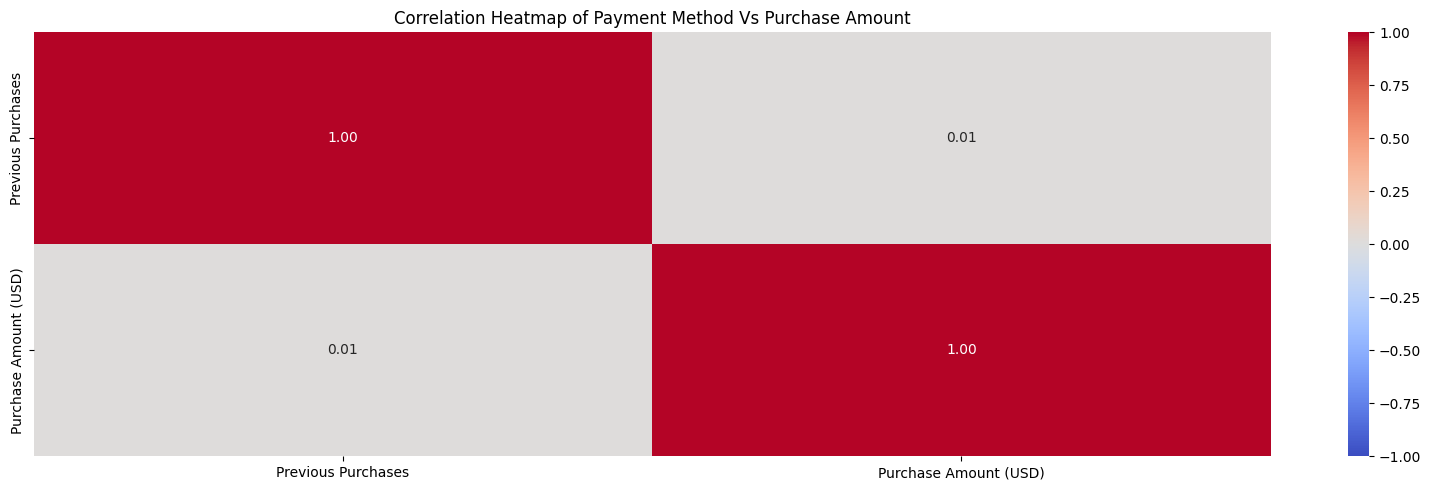

In [42]:
# 2. Payment Method vs. Purchase Amount (USD)
payment_method_purchase_amount_correlation_matrix = df[['Previous Purchases', 'Purchase Amount (USD)']].corr()

# Create a heatmap
plt.figure(figsize=(16, 5))
sns.heatmap(payment_method_purchase_amount_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Heatmap of Payment Method Vs Purchase Amount')

# Show the plot
plt.tight_layout()
plt.show()

**A. Correlation Coefficient Values:**

- The heatmap will show a matrix with correlation coefficient values ranging from -1 to 1.
- 1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally).
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).
- 0 indicates no correlation (no linear relationship between the variables)

**B. Color Intensity:**
- The colors in the heatmap will range from cool (blue) to warm (red), or vice versa, depending on the colormap used (coolwarm in this case).
- Cooler colors (blue) typically represent a negative correlation.
- Warmer colors (red) typically represent a positive correlation.

**C. Interpretation:**

- A high positive correlation coefficient close to 1 (0.85) between Purchase Amount (USD) and Review Rating, it indicates that higher purchase amounts are associated with higher review ratings.

- Conversely, a high negative correlation coefficient close to -1 (-0.75), it suggests that as the purchase amount increases, the review rating tends to decrease.

- If the correlation coefficient is close to 0 (0.01), it means there is little to no linear relationship between purchase amount and review rating.

**6. Shipping Preferences and Costs**

- Shipping Type Analysis: Compare the purchase amount and customer satisfaction based on shipping type.
- Purchase Amount vs. Shipping Type: Investigate whether customers using "Express" shipping spend more than those opting for "Free Shipping."

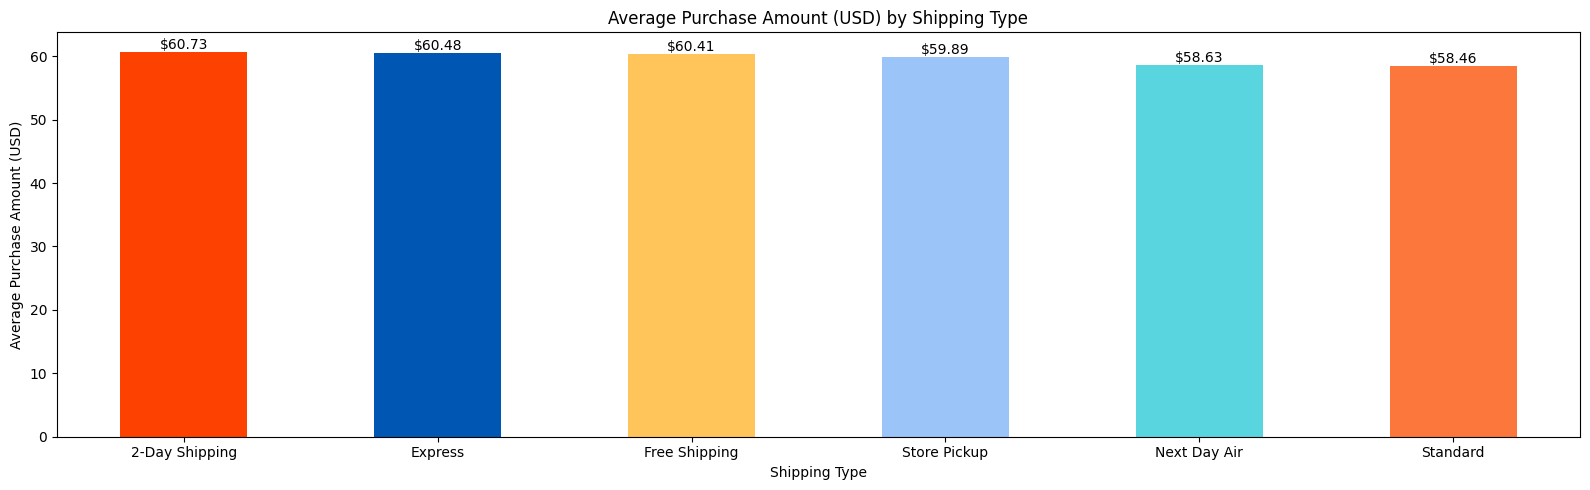

In [43]:
# Average Purchase Amount Vs Shipping Type
shipping_purchase_analysis = df.groupby(['Shipping Type'])['Purchase Amount (USD)'].mean().sort_values(ascending=False)
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the data as a bar chart
bars = shipping_purchase_analysis.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Purchase Amount (USD) by Shipping Type')
plt.xlabel('Shipping Type')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

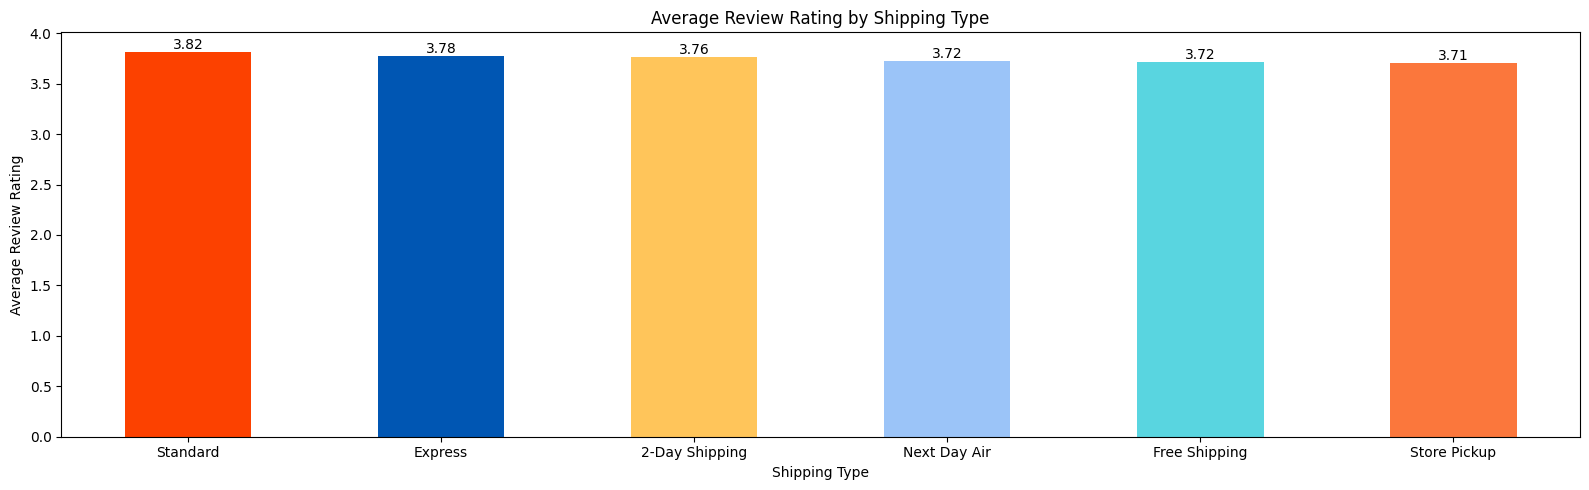

In [44]:
# Average Rating Vs Shipping Type
rating_purchase_analysis = df.groupby(['Shipping Type'])['Review Rating'].mean().sort_values(ascending=False)
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the data as a bar chart
bars = rating_purchase_analysis.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Review Rating by Shipping Type')
plt.xlabel('Shipping Type')
plt.xticks(rotation=0)
plt.ylabel('Average Review Rating')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

**7. Customer Frequency Analysis**

- Frequency of Purchases: Analyze how often different customers make purchases (e.g., Weekly, Quarterly) and their overall lifetime value.
- Loyalty by Frequency: See if customers who purchase more frequently tend to have a higher number of previous purchases, indicating higher loyalty.

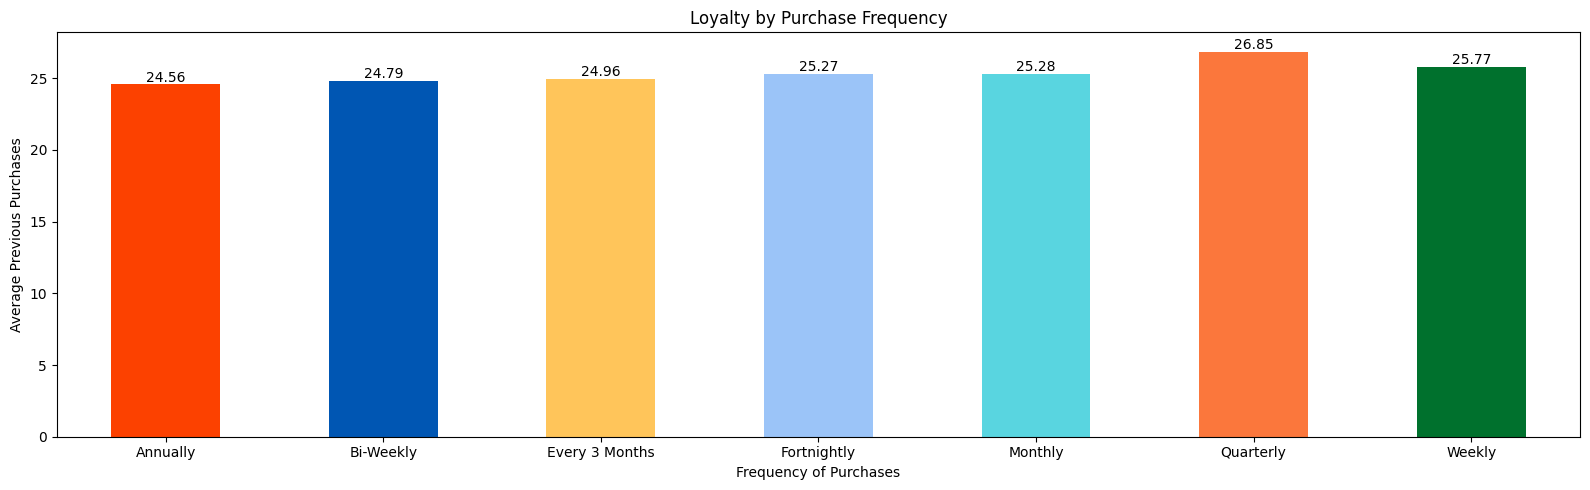

In [45]:
# Frequency of Purchase
frequency_of_purchase = df.groupby('Frequency of Purchases')['Previous Purchases'].mean().sort_index()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C', '#00712D']

# Plot the data as a bar chart
bars = frequency_of_purchase.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Loyalty by Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.xticks(rotation=0)
plt.ylabel('Average Previous Purchases')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

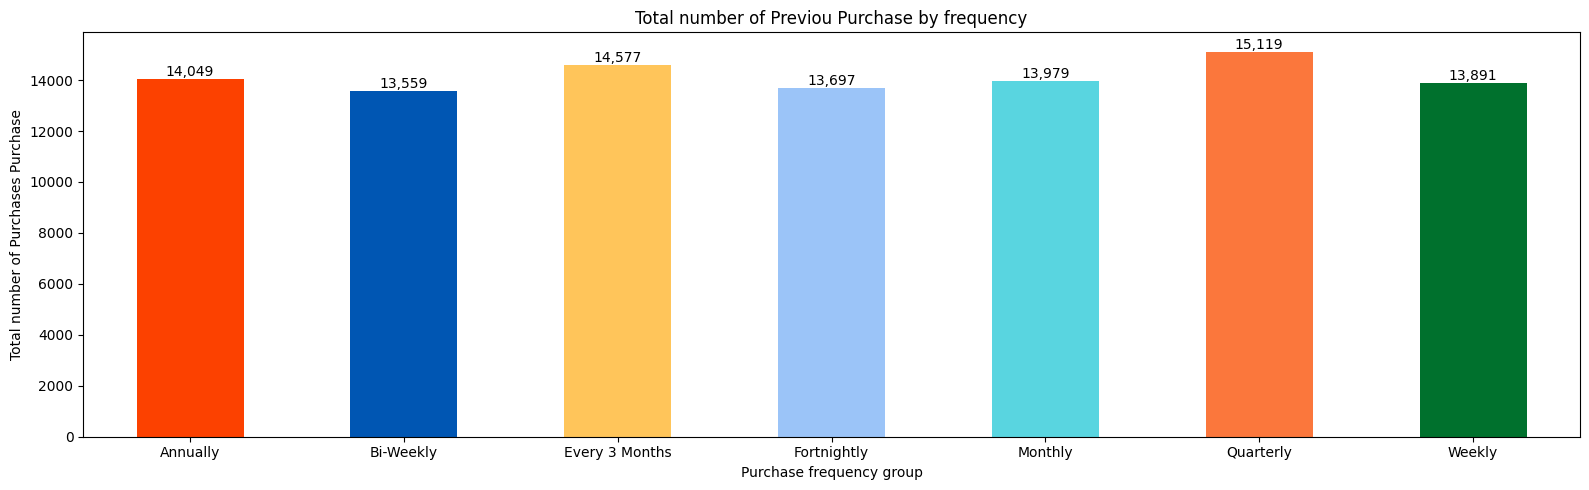

In [46]:
# Frequency of Purchase
frequency_of_purchase = df.groupby('Frequency of Purchases')['Previous Purchases'].sum().sort_index()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C', '#00712D']

# Plot the data as a bar chart
bars = frequency_of_purchase.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Total number of Previou Purchase by frequency')
plt.xlabel('Purchase frequency group')
plt.xticks(rotation=0)
plt.ylabel('Total number of Purchases Purchase')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

**8. Seasonal Purchasing Patterns**

- By Season: Explore how purchasing behavior changes with different seasons (Winter, Spring, Summer, Fall). For example, are customers buying more clothing in winter?

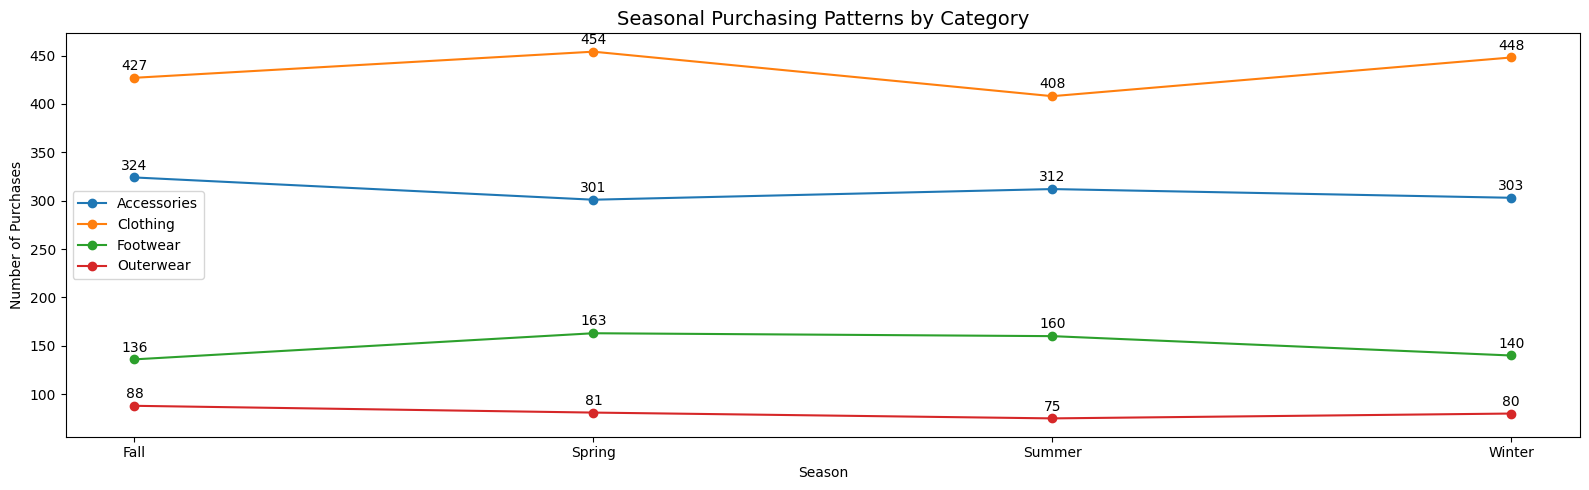

In [47]:
# Group data by Season and Category, and sum purchase amounts
seasonal_data = df.groupby(['Season', 'Category']).agg({
    'Purchase Amount (USD)': 'sum',
    'Item Purchased': 'count'
}).reset_index()

# Rename columns for clarity
seasonal_data.columns = ['Season', 'Category', 'Total Sales (USD)', 'Number of Purchases']

# Plot the data
plt.figure(figsize=(16, 5))

# Add title and labels
plt.title('Seasonal Purchasing Patterns by Category', fontsize=14)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Number of Purchases', fontsize=10)

# Loop through each category and plot with data labels
for category in seasonal_data['Category'].unique():
    season_subset = seasonal_data[seasonal_data['Category'] == category]
    plt.plot(season_subset['Season'], season_subset['Number of Purchases'], label=category, marker='o')

    # Add data labels with some space from the data points
    for i in range(len(season_subset)):
        plt.text(season_subset['Season'].iloc[i], 
                 season_subset['Number of Purchases'].iloc[i] + 5,  # Adjust y position for spacing
                 str(season_subset['Number of Purchases'].iloc[i]), 
                 fontsize=10, 
                 ha='center', 
                 va='bottom',  # Adjust for better alignment
                 color='black')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

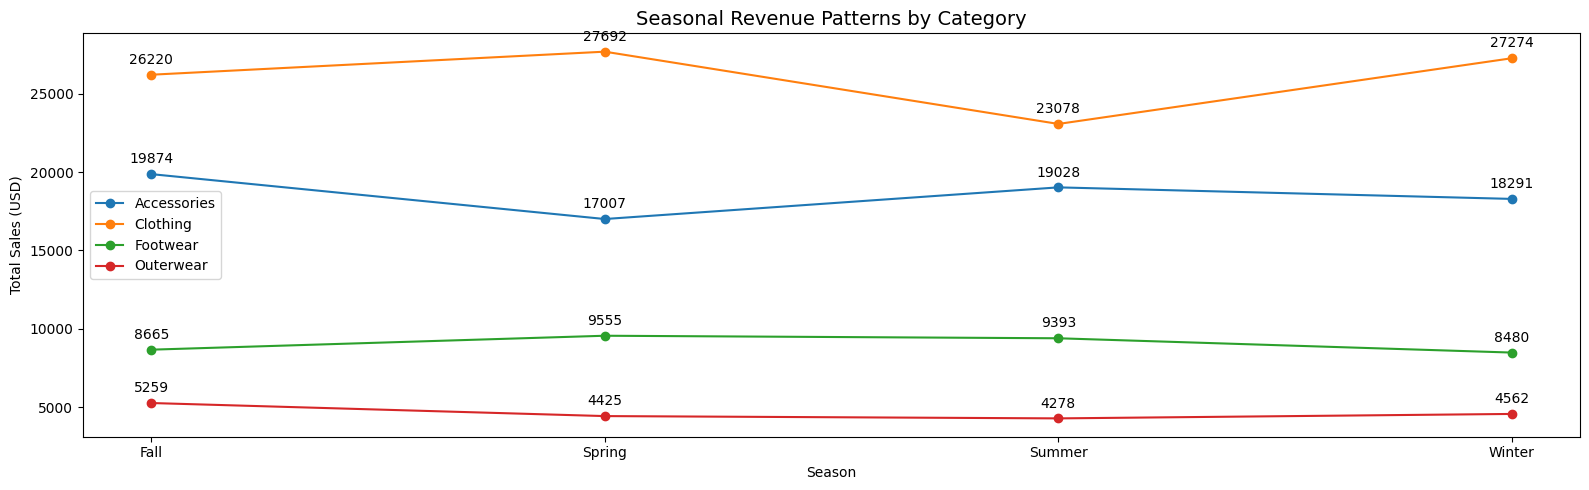

In [48]:
# Group data by Season and Category, and sum purchase amounts
seasonal_data = df.groupby(['Season', 'Category']).agg({
    'Purchase Amount (USD)': 'sum',
    'Item Purchased': 'count'
}).reset_index()

# Rename columns for clarity
seasonal_data.columns = ['Season', 'Category', 'Total Sales (USD)', 'Number of Purchases']

# Plot the data
plt.figure(figsize=(16, 5))

# Add title and labels
plt.title('Seasonal Revenue Patterns by Category', fontsize=14)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Sales (USD)', fontsize=10)

# Loop through each category and plot with data labels
for category in seasonal_data['Category'].unique():
    season_subset = seasonal_data[seasonal_data['Category'] == category]
    plt.plot(season_subset['Season'], season_subset['Total Sales (USD)'], label=category, marker='o')

    # Add data labels with some space from the data points
    for i in range(len(season_subset)):
        plt.text(season_subset['Season'].iloc[i], 
                 season_subset['Total Sales (USD)'].iloc[i] + 500,  # Adjust y position for spacing
                 str(season_subset['Total Sales (USD)'].iloc[i]), 
                 fontsize=10, 
                 ha='center', 
                 va='bottom',  # Adjust for better alignment
                 color='black')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# **Thank you**